In [9]:
import onnxruntime as rt
from PIL import Image
onnx_path = r"C:/Users/KAI/.robotpipe/models/scrfd_person_2.5g.onnx"
session = rt.InferenceSession(onnx_path, providers=['CPUExecutionProvider'])
session

In [23]:
import numpy as np
import cv2 as cv
img = cv.imread("images/trump1.jpg")


print(img.shape)

(662, 604, 3)


In [24]:
print(img.shape[0:2])
img_size = tuple(img.shape[0:2][::-1])
img_size

(662, 604)


(604, 662)

In [25]:
input_size = [640,640]
im_ratio = float(img.shape[0]) / img.shape[1]
model_ratio = float(input_size[1]) / input_size[0]
print(im_ratio, model_ratio)
if im_ratio>model_ratio:
    new_height = input_size[1]
    new_width = int(new_height / im_ratio)
else:
    new_width = input_size[0]
    new_height = int(new_width * im_ratio)
# 图像的缩放
resize_img = cv.resize(img,(new_width,new_height))

det_scale = float(new_height) / img.shape[0]
det_img = np.zeros( (input_size[1], input_size[0], 3), dtype=np.uint8 )
print(new_height,new_width)
det_img[:new_height, :new_width, :] = resize_img

1.096026490066225 1.0
640 583


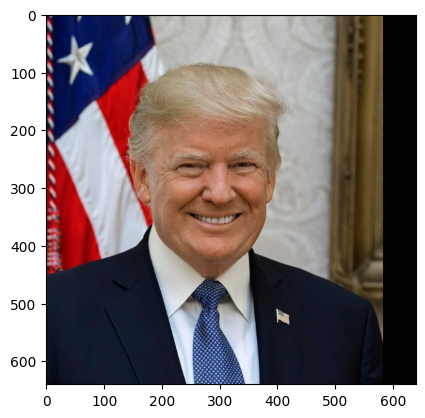

In [27]:
import matplotlib.pyplot as plt

plt.imshow(cv.cvtColor(det_img,cv.COLOR_BGR2RGB))

In [36]:
input_size = tuple(det_img.shape[0:2][::-1])
blob = cv.dnn.blobFromImage(img, 1.0/128, input_size, (127.5,127.5, 127.5), swapRB=True)

output_name = session.get_outputs()[0].name
input_name = session.get_inputs()[0].name

print(input_name,output_name)

net_outs = session.run(None, {input_name : blob})

input.1 490


In [37]:
net_outs

[array([[0.06051022],
        [0.0292792 ],
        [0.02349606],
        ...,
        [0.01712599],
        [0.01965353],
        [0.03469542]], dtype=float32),
 array([[0.07285258],
        [0.03812   ],
        [0.04055583],
        ...,
        [0.0103758 ],
        [0.01382393],
        [0.02812725]], dtype=float32),
 array([[0.09863147],
        [0.09801573],
        [0.07741353],
        [0.06448659],
        [0.05293795],
        [0.04608133],
        [0.03911823],
        [0.03184429],
        [0.02881539],
        [0.02891713],
        [0.02689698],
        [0.0275614 ],
        [0.02746531],
        [0.0247131 ],
        [0.02242061],
        [0.0208596 ],
        [0.02027017],
        [0.01966175],
        [0.02328774],
        [0.03888157],
        [0.07606477],
        [0.10163492],
        [0.07150373],
        [0.05650213],
        [0.04272979],
        [0.04196855],
        [0.03431791],
        [0.0276643 ],
        [0.02476236],
        [0.02509087],
        [0.02391

In [39]:
len(net_outs)

15

In [41]:
input_height = blob.shape[2]
input_width = blob.shape[3]
print(input_height, input_width)

640 640


In [46]:
scores=None

fmc = 5
for idx, stride in enumerate([8, 16, 32, 64, 128]):
    scores = net_outs[idx]
    bbox_preds = net_outs[idx + fmc]
    bbox_preds = bbox_preds * stride
    print("================================================")
    kps_preds = net_outs[idx + fmc * 2] * stride

    pos_inds = np.where(scores>=0.5)[0]
    print(scores)

[[0.06051022]
 [0.0292792 ]
 [0.02349606]
 ...
 [0.01712599]
 [0.01965353]
 [0.03469542]]
[[0.07285258]
 [0.03812   ]
 [0.04055583]
 ...
 [0.0103758 ]
 [0.01382393]
 [0.02812725]]
[[0.09863147]
 [0.09801573]
 [0.07741353]
 [0.06448659]
 [0.05293795]
 [0.04608133]
 [0.03911823]
 [0.03184429]
 [0.02881539]
 [0.02891713]
 [0.02689698]
 [0.0275614 ]
 [0.02746531]
 [0.0247131 ]
 [0.02242061]
 [0.0208596 ]
 [0.02027017]
 [0.01966175]
 [0.02328774]
 [0.03888157]
 [0.07606477]
 [0.10163492]
 [0.07150373]
 [0.05650213]
 [0.04272979]
 [0.04196855]
 [0.03431791]
 [0.0276643 ]
 [0.02476236]
 [0.02509087]
 [0.02391773]
 [0.02330345]
 [0.02234384]
 [0.02041712]
 [0.01588932]
 [0.01549691]
 [0.01434758]
 [0.0134277 ]
 [0.01684538]
 [0.02287126]
 [0.07981735]
 [0.11825886]
 [0.07280952]
 [0.05420157]
 [0.03717083]
 [0.03713527]
 [0.03724763]
 [0.02585891]
 [0.02301234]
 [0.02715373]
 [0.02832127]
 [0.02596459]
 [0.02333233]
 [0.02201235]
 [0.01666501]
 [0.01403913]
 [0.01211679]
 [0.01147372]
 [0.0127

: 